## Seattle Rain Prediction

Given *data about the weather in Seattle*, let's try to predict how much it will **rain** on a given day. 

We will use a variety of regression models to make our predictions. 

Data source: https://www.kaggle.com/datasets/rtatman/did-it-rain-in-seattle-19482017

### Getting Started

In [21]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('seattleWeather_1948-2017.csv')
data

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


### Preprocessing

In [4]:
df = data.copy()

In [5]:
data.isna().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [6]:
# Drop missing rows
df = df.dropna(axis=0).reset_index(drop=True)
df

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25543,2017-12-10,0.00,49,34,False
25544,2017-12-11,0.00,49,29,False
25545,2017-12-12,0.00,46,32,False
25546,2017-12-13,0.00,48,34,False


In [8]:
# Convert RAIN column to numeric
df['RAIN'] = df['RAIN'].astype(int)
df

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,1
1,1948-01-02,0.59,45,36,1
2,1948-01-03,0.42,45,35,1
3,1948-01-04,0.31,45,34,1
4,1948-01-05,0.17,45,32,1
...,...,...,...,...,...
25543,2017-12-10,0.00,49,34,0
25544,2017-12-11,0.00,49,29,0
25545,2017-12-12,0.00,46,32,0
25546,2017-12-13,0.00,48,34,0


In [12]:
# Extract Date Features 
df['DATE'] = pd.to_datetime(df['DATE'])

df['YEAR'] = df['DATE'].apply(lambda x: x.year)
df['MONTH'] = df['DATE'].apply(lambda x: x.month)
df['DAY'] = df['DATE'].apply(lambda x: x.day)

In [13]:
df

,DATE,PRCP,TMAX,TMIN,RAIN,YEAR,MONTH,DAY
0,1948-01-01,0.47,51,42,1,1948,1,1
1,1948-01-02,0.59,45,36,1,1948,1,2
2,1948-01-03,0.42,45,35,1,1948,1,3
3,1948-01-04,0.31,45,34,1,1948,1,4
4,1948-01-05,0.17,45,32,1,1948,1,5
...,...,...,...,...,...,...,...,...
25543,2017-12-10,0.00,49,34,0,2017,12,10
25544,2017-12-11,0.00,49,29,0,2017,12,11
25545,2017-12-12,0.00,46,32,0,2017,12,12
25546,2017-12-13,0.00,48,34,0,2017,12,13


In [14]:
df = df.drop('DATE', axis=1)
df

,PRCP,TMAX,TMIN,RAIN,YEAR,MONTH,DAY
0,0.47,51,42,1,1948,1,1
1,0.59,45,36,1,1948,1,2
2,0.42,45,35,1,1948,1,3
3,0.31,45,34,1,1948,1,4
4,0.17,45,32,1,1948,1,5
...,...,...,...,...,...,...,...
25543,0.00,49,34,0,2017,12,10
25544,0.00,49,29,0,2017,12,11
25545,0.00,46,32,0,2017,12,12
25546,0.00,48,34,0,2017,12,13


In [15]:
# Split df into X and y
y = df['PRCP']
X = df.drop('PRCP', axis=1)

In [16]:
X

,TMAX,TMIN,RAIN,YEAR,MONTH,DAY
0,51,42,1,1948,1,1
1,45,36,1,1948,1,2
2,45,35,1,1948,1,3
3,45,34,1,1948,1,4
4,45,32,1,1948,1,5
...,...,...,...,...,...,...
25543,49,34,0,2017,12,10
25544,49,29,0,2017,12,11
25545,46,32,0,2017,12,12
25546,48,34,0,2017,12,13


In [17]:
y

0        0.47
1        0.59
2        0.42
3        0.31
4        0.17
         ... 
25543    0.00
25544    0.00
25545    0.00
25546    0.00
25547    0.00
Name: PRCP, Length: 25548, dtype: float64

In [18]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
X_train

,TMAX,TMIN,RAIN,YEAR,MONTH,DAY
3975,47,40,1,1958,11,19
25065,95,69,0,2016,8,19
5337,70,54,1,1962,8,12
14188,52,44,1,1986,11,5
13176,52,46,1,1984,1,28
...,...,...,...,...,...,...
10955,44,39,1,1977,12,29
17289,62,49,0,1995,5,3
5192,50,37,1,1962,3,20
12172,73,52,0,1981,4,29


In [19]:
# Scale X
scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

X_train

,TMAX,TMIN,RAIN,YEAR,MONTH,DAY
0,-0.985028,-0.508563,1.150379,-1.220371,1.301661,0.373320
1,2.787580,2.757421,-0.869278,1.657357,0.430591,0.373320
2,0.822680,1.068119,1.150379,-1.021907,0.430591,-0.423973
3,-0.592048,-0.058083,1.150379,0.168877,1.301661,-1.221266
4,-0.592048,0.167157,1.150379,0.069645,-1.601906,1.398411
...,...,...,...,...,...,...
17878,-1.220816,-0.621184,1.150379,-0.277667,1.592018,1.512310
17879,0.193912,0.505018,-0.869278,0.615421,-0.440479,-1.449064
17880,-0.749240,-0.846424,1.150379,-1.021907,-1.021192,0.487219
17881,1.058468,0.842878,-0.869278,-0.079203,-0.730836,1.512310


In [20]:
y_train

3975     0.02
25065    0.00
5337     0.07
14188    0.57
13176    0.01
         ... 
10955    0.38
17289    0.00
5192     0.05
12172    0.00
235      0.11
Name: PRCP, Length: 17883, dtype: float64

### Predicting the PRCP column

In [25]:
models = {
     "                         Linear Regression": LinearRegression(), 
     "          L2 Regularized Linear Regression": Ridge(),
     "                       K-Nearest Neighbors": KNeighborsRegressor(),
     "                             Decision Tree": DecisionTreeRegressor(),
     "    Support Vector Machine (Linear Kernel)": LinearSVR(),
     "Support Vector Machine (Non-Linear Kernel)": SVR(),
     "                           Neural Networks": MLPRegressor(),
     "                            Random Forests": RandomForestRegressor(), 
     "                         Gradient Boosting": GradientBoostingRegressor(),
     "                                   XGBoost": XGBRegressor(),
     "                                  LightGBM": LGBMRegressor(),
     "                                  CatBoost": CatBoostRegressor(verbose=0)
}

In [26]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                         Linear Regression trained.
          L2 Regularized Linear Regression trained.
                       K-Nearest Neighbors trained.
                             Decision Tree trained.


/home/john/miniconda3/envs/dsenv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


    Support Vector Machine (Linear Kernel) trained.
Support Vector Machine (Non-Linear Kernel) trained.
                           Neural Networks trained.
                            Random Forests trained.
                         Gradient Boosting trained.
                                   XGBoost trained.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000301 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 265
[LightGBM] [Info] Number of data points in the train set: 17883, number of used features: 6
[LightGBM] [Info] Start training from score 0.105664
                                  LightGBM trained.
                                  CatBoost trained.


In [27]:
for name, model in models.items():
    print(name + " R^2: {:.5f}".format(model.score(X_test, y_test)))

                         Linear Regression R^2: 0.27661
          L2 Regularized Linear Regression R^2: 0.27660
                       K-Nearest Neighbors R^2: 0.22815
                             Decision Tree R^2: -0.46027
    Support Vector Machine (Linear Kernel) R^2: 0.16830
Support Vector Machine (Non-Linear Kernel) R^2: 0.27201
                           Neural Networks R^2: 0.32489
                            Random Forests R^2: 0.23583
                         Gradient Boosting R^2: 0.33063
                                   XGBoost R^2: 0.20782
                                  LightGBM R^2: 0.32303
                                  CatBoost R^2: 0.28960


### Predicting the RAIN column

In [28]:
df2 = data.copy()

In [29]:
# Drop missing rows
df2 = df2.dropna(axis=0).reset_index(drop=True)

In [30]:
# Convert RAIN column to numeric
df2['RAIN'] = df2['RAIN'].astype(int)

In [31]:
# Extract Date Features 
df2['DATE'] = pd.to_datetime(df2['DATE'])

df2['YEAR'] = df2['DATE'].apply(lambda x: x.year)
df2['MONTH'] = df2['DATE'].apply(lambda x: x.month)
df2['DAY'] = df2['DATE'].apply(lambda x: x.day)

In [32]:
df2 = df2.drop('DATE', axis=1)
df2

,PRCP,TMAX,TMIN,RAIN,YEAR,MONTH,DAY
0,0.47,51,42,1,1948,1,1
1,0.59,45,36,1,1948,1,2
2,0.42,45,35,1,1948,1,3
3,0.31,45,34,1,1948,1,4
4,0.17,45,32,1,1948,1,5
...,...,...,...,...,...,...,...
25543,0.00,49,34,0,2017,12,10
25544,0.00,49,29,0,2017,12,11
25545,0.00,46,32,0,2017,12,12
25546,0.00,48,34,0,2017,12,13


In [34]:
# Split df into X and y
y = df2['RAIN']
X = df2.drop('RAIN', axis=1)

In [35]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
X_train

,PRCP,TMAX,TMIN,YEAR,MONTH,DAY
3975,0.02,47,40,1958,11,19
25065,0.00,95,69,2016,8,19
5337,0.07,70,54,1962,8,12
14188,0.57,52,44,1986,11,5
13176,0.01,52,46,1984,1,28
...,...,...,...,...,...,...
10955,0.38,44,39,1977,12,29
17289,0.00,62,49,1995,5,3
5192,0.05,50,37,1962,3,20
12172,0.00,73,52,1981,4,29


In [36]:
# Scale X
scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

X_train

,PRCP,TMAX,TMIN,YEAR,MONTH,DAY
0,-0.361781,-0.985028,-0.508563,-1.220371,1.301661,0.373320
1,-0.446246,2.787580,2.757421,1.657357,0.430591,0.373320
2,-0.150618,0.822680,1.068119,-1.021907,0.430591,-0.423973
3,1.961010,-0.592048,-0.058083,0.168877,1.301661,-1.221266
4,-0.404014,-0.592048,0.167157,0.069645,-1.601906,1.398411
...,...,...,...,...,...,...
17878,1.158591,-1.220816,-0.621184,-0.277667,1.592018,1.512310
17879,-0.446246,0.193912,0.505018,0.615421,-0.440479,-1.449064
17880,-0.235084,-0.749240,-0.846424,-1.021907,-1.021192,0.487219
17881,-0.446246,1.058468,0.842878,-0.079203,-0.730836,1.512310


In [37]:
y_train

3975     1
25065    0
5337     1
14188    1
13176    1
        ..
10955    1
17289    0
5192     1
12172    0
235      1
Name: RAIN, Length: 17883, dtype: int64

In [39]:
clf = LinearSVC()
clf.fit(X_train, y_train)

print("Test Accuracy: {:.2f}%".format(clf.score(X_test, y_test)*100))

Test Accuracy: 100.00%


### Examining Correlations 

In [40]:
corr = pd.concat([X_train, y_train], axis=1).corr()
corr

,PRCP,TMAX,TMIN,YEAR,MONTH,DAY,RAIN
PRCP,1.000000,-0.229904,-0.068346,-0.008457,0.009781,-0.005343,0.006687
TMAX,-0.229904,1.000000,0.860582,0.062575,0.155203,0.004787,0.016086
TMIN,-0.068346,0.860582,1.000000,0.122744,0.222624,0.004888,0.009577
YEAR,-0.008457,0.062575,0.122744,1.000000,-0.001206,0.001029,-0.007178
MONTH,0.009781,0.155203,0.222624,-0.001206,1.000000,0.018366,-0.002031
DAY,-0.005343,0.004787,0.004888,0.001029,0.018366,1.000000,0.005148
RAIN,0.006687,0.016086,0.009577,-0.007178,-0.002031,0.005148,1.000000


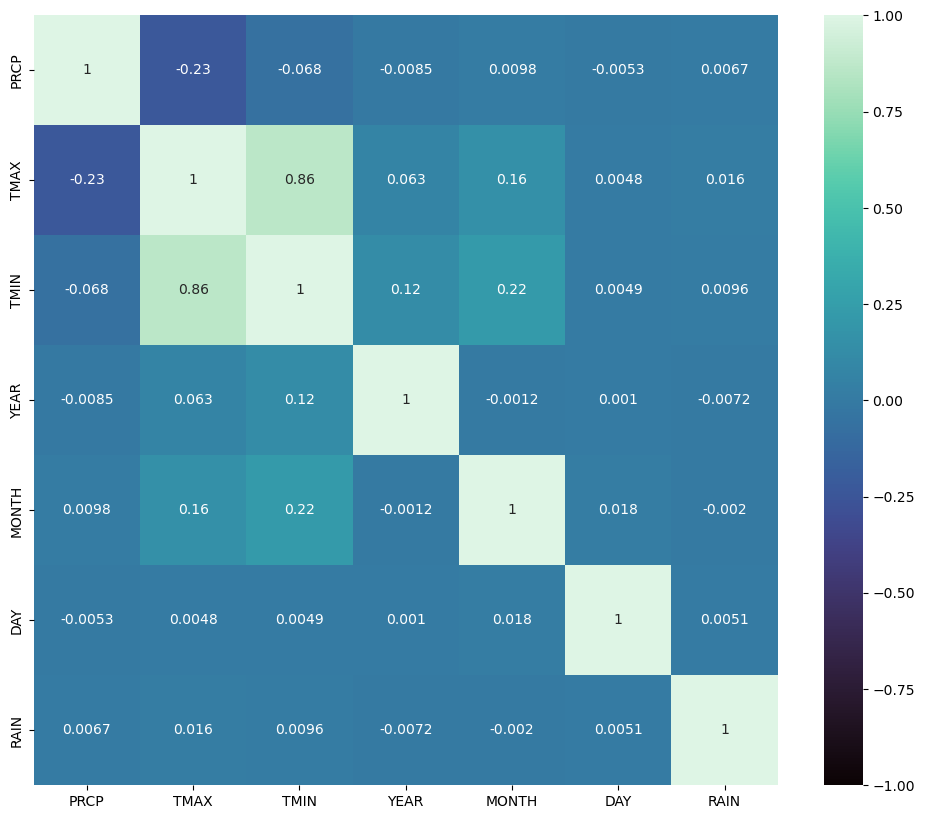

In [41]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.show()

### Classifying using a simple function

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
X_test = X_test[['PRCP']]
X_test

,PRCP
4826,0.22
9170,0.00
21575,0.00
2784,0.00
2328,0.00
...,...
15527,0.01
10325,0.03
17102,0.00
24009,1.71


In [52]:
np.squeeze(np.array(X_test > 0, dtype=int))

array([1, 0, 0, ..., 0, 1, 1])

In [53]:
y_pred = X_test > 0
y_pred = np.squeeze(np.array(y_pred, dtype=int))

In [54]:
print("Test Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

Test Accuracy: 100.00%
